### PS 6

In [99]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [100]:
b = pd.read_csv('biden.csv')
b = biden.dropna()
b.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


### (a)

In [101]:
y = b['biden'].values
var = ['female', 'age', 'educ', 'dem', 'rep']
X = b[var].values
print(b.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807 entries, 0 to 1806
Data columns (total 6 columns):
biden     1807 non-null int64
female    1807 non-null int64
age       1807 non-null int64
educ      1807 non-null int64
dem       1807 non-null int64
rep       1807 non-null int64
dtypes: int64(6)
memory usage: 98.8 KB
None


In [102]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)
b_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)
b_tree.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

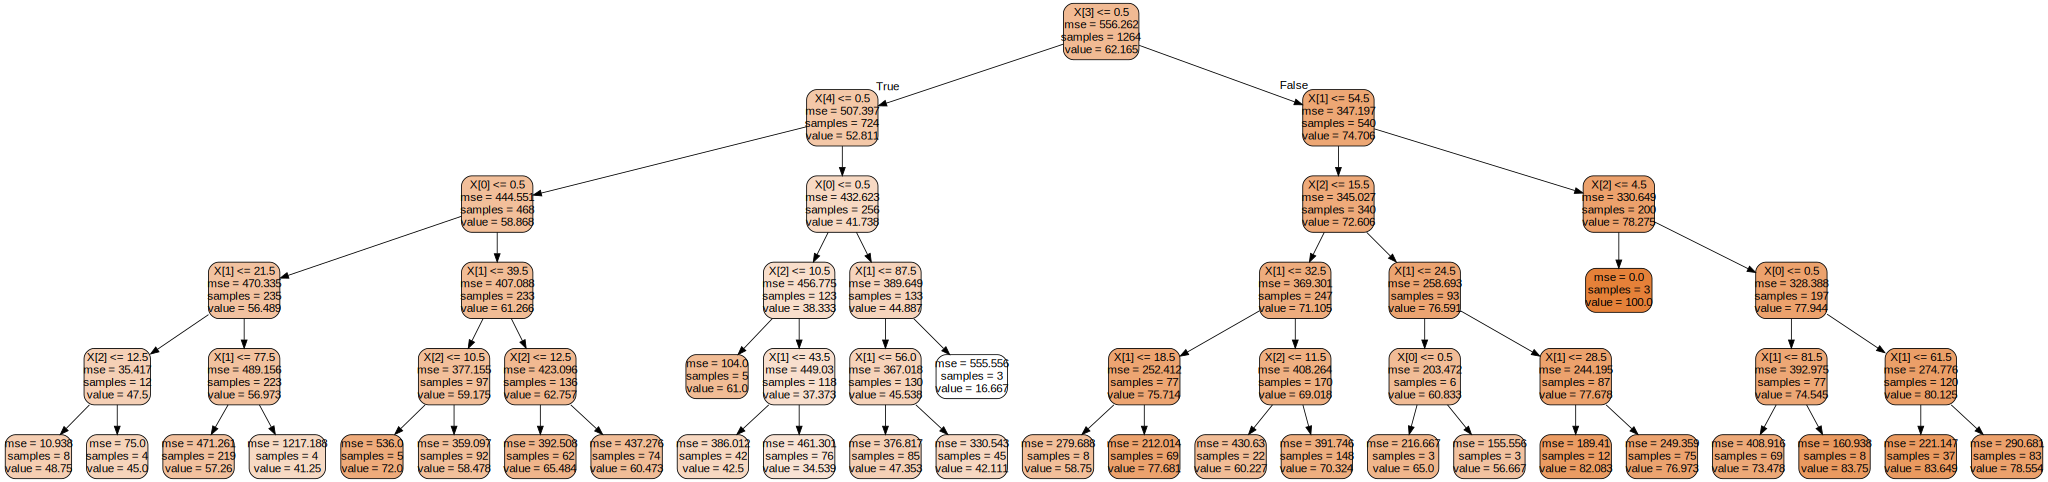

In [103]:

b_tree_viz = export_graphviz(
    b_tree,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz)
graph.render('b_tree_viz2')
graph

In [104]:
y_pred = b_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('The test MSE is', MSE1)

The test MSE is 406.672049146



X[0]=female, X[1]=age, X[2]=educ, X[3]=dem, X[4]=rep

The root shows a cutoff between democrats and non-democrats. Non-democrats have a lower value of feeling thermometer towards Biden.

Within Non-democrats, Non-republicans have a lower value of feeling thermometer towards Biden. For both Republicans and Non-republicans, females have a more positive attitudes towards Biden. For non-republican males, older people like Biden more, except for people older than 75. People with less education like Biden more. Within people younger than 21.5, people with less education like Biden more. Within people younger than or equal to 39.5, people with less than 10.5 years of education like Biden more. Within people older than 39.5, people with less than 12.5 yeats of education like Biden more.

Withion Democrats, people older than 54.5 like Biden more than other groups. Within people less than 54.5 years, the next cutoff variable is the ages, in which people younger than 32.5 like Biden more, while people older than 24.5 like Biden more. Within people older than 54.5, people with less than 4.5 years of education extremely like Biden, while for others, male like Biden more, and older female and younger male have a more positive attitudes towards Biden than younger female and older male, respectively.

### (b)

In [105]:
len(y_train)

1264

In [106]:
MSE_lst = []
for i in range(1, 1264):
    b_tree2 = DecisionTreeRegressor(max_depth= i, min_samples_leaf=3)
    b_tree2.fit(X_train, y_train)
    y_pred = b_tree2.predict(X_test)
    MSE2 = mean_squared_error(y_test, y_pred)
    MSE_lst.append(MSE2)
print('The optimal level of tree complexity is', MSE_lst.index(min(MSE_lst)) + 1, 'with MSE', 
     min(MSE_lst))

The optimal level of tree complexity is 3 with MSE 394.761999922


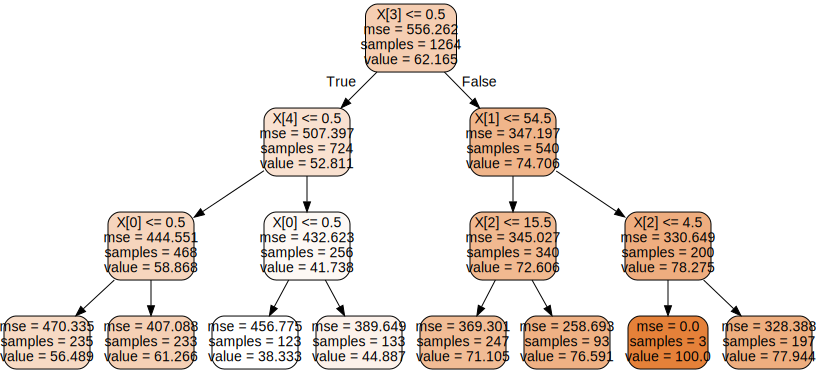

In [107]:
b_tree2 = DecisionTreeRegressor(max_depth=3)
b_tree2.fit(X_train, y_train)
b_tree_viz2 = export_graphviz(
    b_tree2,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz2)
graph.render('b_tree_viz2')
graph

X[0]=female, X[1]=age, X[2]=educ, X[3]=dem, X[4]=rep

Democrats like Biden more than Republicans.

In terms of non-democrats, non-republicans like Biden more other their counterpart. Females like biden more, in either cases.

Among Democrats, people older than 54.5 like Biden more other groups. The next cutoff is years of education. For people younger than or equal to 54.5, people with more than 15.5 years of education like Biden more. For people older 54.5, people with 4.5 years of education extremely like Biden with 100 feeling thermometer value.

Pruning the tree does improve the test MSE.

### (C)

In [108]:
from sklearn.ensemble import BaggingRegressor
# n_estimators is how many samples from the data to take (the number of trees)
# max_samples is the maximum number of observations to include in each bootstrapped data sample
b_tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
# b_tree3 = BaggingRegressor(DecisionTreeRegressor(max_depth=3, min_samples_leaf=5), n_estimators=100,
#                              max_samples=100, bootstrap=True, oob_score=True, random_state=15)
b_tree3.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [109]:
b_tree3.score(X, y)
y_pred3 = b_tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('Test MSE=', MSE3)

Test MSE= 406.000558395


In [110]:
def imp_measure(tree):
    for t in tree.estimators_: 
        imp = np.mean([t.feature_importances_], axis=0)
        idx = np.argsort(imp)[::-1]
    print("The variable importance measures are")
    for i in range (0, len(var)):
        print(var[i], ':', imp[idx[i]])

In [111]:
imp_measure(b_tree3)


The variable importance measures are
female : 0.325355627158
age : 0.317210154928
educ : 0.223563695922
dem : 0.0821600984362
rep : 0.0517104235556


The rank of importance of the variables, from the most important to the least important is female, age, edu, dem, and rep.

### (d)

In [112]:
from sklearn.ensemble import RandomForestRegressor

b_tree4 = RandomForestRegressor(n_estimators=53, max_features=1, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree4.fit(X, y)

b_tree4.score(X, y)
y_pred4 = b_tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print('Test MSE=', MSE4)

Test MSE= 532.875057972


In [113]:
imp_measure(b_tree4)


The variable importance measures are
female : 0.481931166418
age : 0.223742001827
educ : 0.1819264516
dem : 0.0954252786358
rep : 0.0169751015199


In [114]:
b_tree5 = RandomForestRegressor(n_estimators=53, max_features=2, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree5.fit(X, y)

b_tree5.score(X, y)
y_pred5 = b_tree5.oob_prediction_
MSE5 = mean_squared_error(y, y_pred5)
print('Test MSE=', MSE5)

Test MSE= 538.192542935


In [115]:
imp_measure(b_tree5)


The variable importance measures are
female : 0.449080851767
age : 0.223742001827
educ : 0.209092407901
dem : 0.093709122392
rep : 0.0243756161125


In [116]:
b_tree6 = RandomForestRegressor(n_estimators=53, max_features=3, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree6.fit(X, y)

b_tree6.score(X, y)
y_pred6 = b_tree6.oob_prediction_
MSE6 = mean_squared_error(y, y_pred6)
print('Test MSE=', MSE6)

Test MSE= 535.761962701


In [117]:
imp_measure(b_tree6)

The variable importance measures are
female : 0.467522070848
age : 0.230215541631
educ : 0.183440570909
dem : 0.0872355825875
rep : 0.0315862340252


Including 3 variables brings us the lowest MSE, that followed by 1 and 2 variables.
For all these 3 models, the rank of importance of the variables, from the most important to the least important is female, age, edu, dem, and rep.